# Pathwise estimation for delta and vega for the Black-Scholes model

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import enum 

In [7]:
# This class defines puts and calls
class OptionType(enum.Enum):
    CALL = 1.0
    PUT = -1.0

In [20]:
# Black-Scholes Call option price
def BS_Call_Put_Option_Price(CP,S_0,K,sigma,t,T,r):
    K = np.array(K).reshape([len(K),1])
    d1    = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0)) * (T-t)) / (sigma * np.sqrt(T-t))
    d2    = d1 - sigma * np.sqrt(T-t)
    
    if CP == OptionType.CALL:
        value = st.norm.cdf(d1) * S_0 - st.norm.cdf(d2) * K * np.exp(-r * (T-t))
    elif CP == OptionType.PUT:
        value = st.norm.cdf(-d2) * K * np.exp(-r * (T-t)) - st.norm.cdf(-d1)*S_0
    return value

In [9]:
# Functions to calculate Delta, Vega and Gamma 
def BS_Delta(CP,S_0,K,sigma,t,T,r):
    K = np.array(K).reshape([len(K),1])
    d1    = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0)) * (T-t)) / (sigma * np.sqrt(T-t))
    
    if CP == OptionType.CALL:
        value = st.norm.cdf(d1)
    elif CP == OptionType.PUT:
        value = st.norm.cdf(d1) - 1
    return value

# Gamma is the same for call and put option
def BS_Gamma(S_0,K,sigma,t,T,r):
    K = np.array(K).reshape([len(K),1])
    d1    = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0)) * (T-t)) / (sigma * np.sqrt(T-t))
    return st.norm.pdf(d1) / (S_0 * sigma * np.sqrt(T-t))


def BS_Vega(S_0,K,sigma,t,T,r):
    d1    = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0)) * (T-t)) / (sigma * np.sqrt(T-t))
    
    return S_0 * st.norm.pdf(d1) * np.sqrt(T-t)

In [14]:
def GeneratePathsGBMEuler(NoOfPaths,NoOfSteps,T,r,sigma,S_0):    
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps+1])
   
    # Approximation
    S = np.zeros([NoOfPaths, NoOfSteps+1])
    S[:,0] = S_0
    
    X = np.zeros([NoOfPaths, NoOfSteps+1])
    X[:,0] = np.log(S_0)
      
    time = np.zeros([NoOfSteps+1])
        
    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        W[:,i+1] = W[:,i] + np.power(dt, 0.5)*Z[:,i]
        
        X[:,i+1] = X[:,i] + (r - .5*sigma**2.0)* dt + sigma * (W[:, i+1] - W[:, i])
        time[i+1] = time[i] + dt
        
    # Retun S
    paths = {"time":time,"S":np.exp(X)}
    return paths

In [10]:
def EUOptionPriceFromMCPathsGeneralized(CP, S, K, T, r):
    # S is a vector of Monte Carlo samples at T
    result = np.zeros([len(K), 1])
    
    if CP == OptionType.CALL:
        for (idx, k) in enumerate(K):
            result[idx] = np.exp(-r * T) * np.mean(np.maximum(S - k, 0))
    elif CP == OptionType.PUT:
        for (idx, k) in enumerate(K):
            result[idx] = np.exp(-r * T) * np.mean(np.maximum(k - S, 0))
    
    return result

In [11]:
def PathwiseDelta(S0, S, K, r, T):
    temp1 = S[:, -1] > K
    return np.exp(-r*T)*np.mean(S[:, -1] / S0 * temp1)

In [22]:
def PathwiseVega(S0, S, sigma, K, r, T):
    temp1 = S[:, -1] > K
    temp2 = S[:, -1] * (np.log(S[:, -1] / S0) - (r + 0.5 * sigma ** 2) * T) / sigma
    
    return np.exp(-r * T) * np.mean(temp1 * temp2)

Running simumlation with 5.0 paths
Running simumlation with 25.0 paths
Running simumlation with 46.0 paths
Running simumlation with 66.0 paths
Running simumlation with 86.0 paths
Running simumlation with 107.0 paths
Running simumlation with 127.0 paths
Running simumlation with 147.0 paths
Running simumlation with 167.0 paths
Running simumlation with 188.0 paths
Running simumlation with 208.0 paths
Running simumlation with 228.0 paths
Running simumlation with 249.0 paths
Running simumlation with 269.0 paths
Running simumlation with 289.0 paths
Running simumlation with 310.0 paths
Running simumlation with 330.0 paths
Running simumlation with 350.0 paths
Running simumlation with 371.0 paths
Running simumlation with 391.0 paths
Running simumlation with 411.0 paths
Running simumlation with 431.0 paths
Running simumlation with 452.0 paths
Running simumlation with 472.0 paths
Running simumlation with 492.0 paths
Running simumlation with 513.0 paths
Running simumlation with 533.0 paths
Running

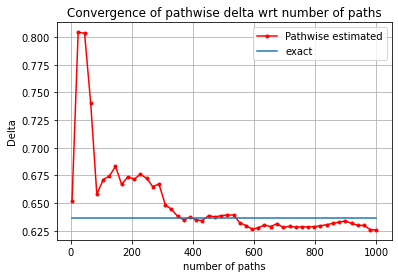

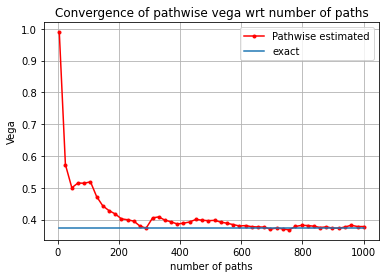

In [23]:
def mainCalculation():
    CP      = OptionType.CALL
    S0      = 1
    r       = 0.06
    sigma   = 0.3
    T       = 1
    K       = np.array([S0])
    t       = 0
    
    NoOfSteps = 1000
    delta_Exact = BS_Delta(CP, S0, K, sigma, t, T, r)
    vega_Exact  = BS_Vega(S0, K, sigma, t, T, r)
    
    NoOfPathsV = np.round(np.linspace(5, 1000, 50))
    deltaPathWiseV = np.zeros(len(NoOfPathsV))
    vegaPathWiseV  = np.zeros(len(NoOfPathsV))
    
    for(idx, nPaths) in enumerate(NoOfPathsV):
        print('Running simumlation with {0} paths'.format(nPaths))
        np.random.seed(3)
        paths1 = GeneratePathsGBMEuler(int(nPaths), NoOfSteps, T, r, sigma, S0)
        S = paths1["S"]
        delta_pathwise = PathwiseDelta(S0, S, K, r, T)
        deltaPathWiseV[idx] = delta_pathwise
        
        vega_pathwise = PathwiseVega(S0, S, sigma, K, r, T)
        vegaPathWiseV[idx] = vega_pathwise
        
    plt.figure(1)
    plt.grid()
    plt.plot(NoOfPathsV, deltaPathWiseV, ".-r")
    plt.plot(NoOfPathsV, delta_Exact * np.ones([len(NoOfPathsV), 1]))
    plt.xlabel("number of paths")
    plt.ylabel("Delta")
    plt.title("Convergence of pathwise delta wrt number of paths")
    plt.legend(['Pathwise estimated', 'exact'])
    
    plt.figure(2)
    plt.grid()
    plt.plot(NoOfPathsV, vegaPathWiseV, ".-r")
    plt.plot(NoOfPathsV, vega_Exact * np.ones([len(NoOfPathsV), 1]))
    plt.xlabel("number of paths")
    plt.ylabel("Vega")
    plt.title("Convergence of pathwise vega wrt number of paths")
    plt.legend(['Pathwise estimated', 'exact'])
    
mainCalculation()